In [8]:
import pandas as pd
import numpy as np
# pd.DataFrame.
scores_path = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/mrpc/score_per_layer.scv'
# scores_path = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/wikitext/rate_per_layer.scv'
df = pd.read_csv(scores_path)
# df.iloc[:,1:].plot.scatter(0, 1)
# df.plot.scatter(0, 1)
# df.plot.scatter(0, 4, df.iloc[:,4] * 400)
# scores = torch.tensor(df.iloc[:,1:].values)

In [60]:
for ratio in np.arange(0,8) / 8:
    print(ratio)

0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875


In [58]:
import torch
scores = torch.tensor(df.iloc[:,1:].values)
num_scores = scores.numel()
ratio = 1 / 8
border_idx = int(num_scores * ratio)
threshold = scores.reshape([-1,1]).sort(dim=0)[0][border_idx]
# threshold
mask = torch.where(scores>=threshold, 1, 0)
# mask
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(mask.sum(dim=1))
ax.plot(torch.ones_like(mask).sum(dim=1), color='red', linestyle='dotted')

tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 0, 1, 1, 1],
        [1, 0, 1, 0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1, 1, 1, 0],
        [1, 0, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 0],
        [1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 0, 0],
        [1, 1, 0, 1, 0, 1, 0, 1],
        [1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1,

Text(0.5, 1.0, 'Pruning trade-off for Mixtral 8x7B on QNLI')

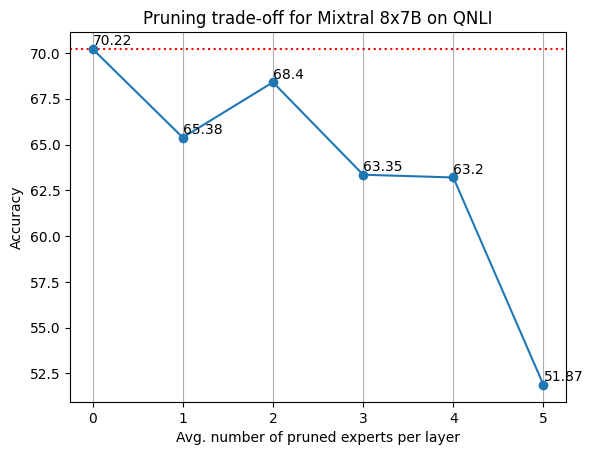

In [73]:
x=np.array([0,1,2,3,4,5])
y=np.array([70.22, 65.38, 68.4, 63.35, 63.2, 51.87])
fig, ax = plt.subplots()
ax.axhline(70.22, color='red', linestyle='dotted')
for xx,yy in zip(x,y):
    ax.text(xx, yy + .2, yy)
ax.xaxis.grid()
# ax.yaxis.grid()
ax.plot(x,y, marker='o')
plt.xlabel("Avg. number of pruned experts per layer")
plt.ylabel("Accuracy")
plt.title('Pruning trade-off for Mixtral 8x7B on QNLI')

In [70]:
from pathlib import Path
import json
from collections import defaultdict

runs_dir=Path('/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/qnli')
paths_to_result_file = runs_dir.glob('**/results*.json')
list_acc_per_task = defaultdict(list)
for i, path_to_result_file in enumerate(paths_to_result_file):
    print(path_to_result_file)
    folder_with_date = str(Path(path_to_result_file).name.split('_r'))
    with path_to_result_file.open() as f:
        j = json.load(f)
        r = j['results']
        for task_name, rr in r.items():
            list_acc_per_task[task_name].append(rr['acc'])
print(list_acc_per_task)


/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/qnli/results_r0.375.json
/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/qnli/results_r0.625.json
/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/qnli/results_r0.125.json
/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/qnli/results_r0.500.json
/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/qnli/results_r0.750.json
/home/devuser/nlyalyus/projects/lm-evaluation-harness/results/moe/mistralai__Mixtral-8x7B-Instruct-v0.1/qnli/results_r0.250.json
defaultdict(<class 'list'>, {'qnli': [0.633534687900421, 0.5180303862346696, 0.6538531942156325, 0.6320702910488742, 0.518762584660443, 0.6840563792787846]})


tensor([0.1030], dtype=torch.float64)

tensor([[1, 1, 1, 0, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 1],
        [1, 1, 0, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1],
        [1, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1],
        [0, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1,

<Axes: >

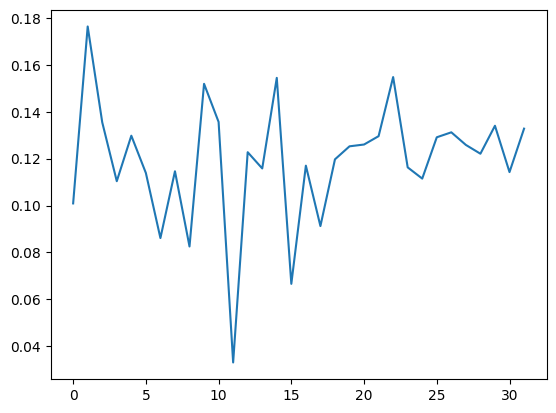

In [41]:
df.iloc[:, 4].plot()

<Axes: >

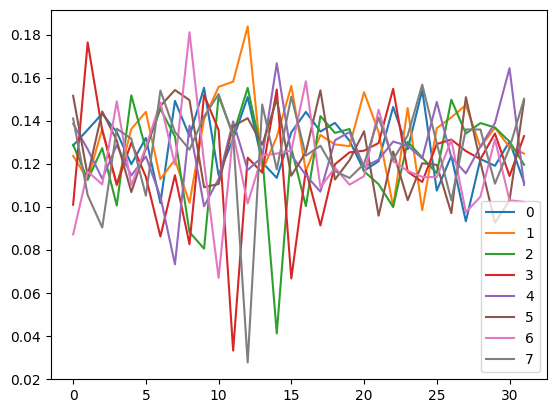

In [33]:
df.iloc[:, 1:].plot()

<Axes: ylabel='Density'>

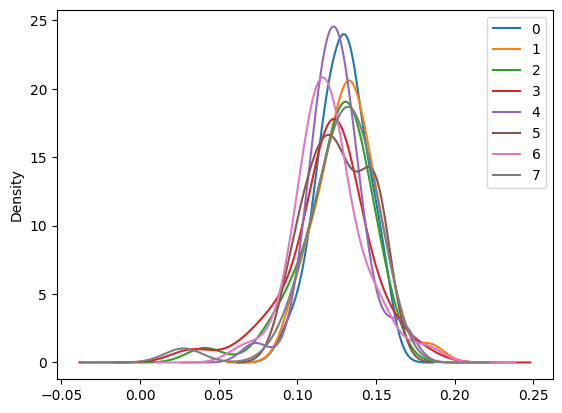

In [32]:
df.iloc[:, 1:].plot(kind='kde')

<Axes: >

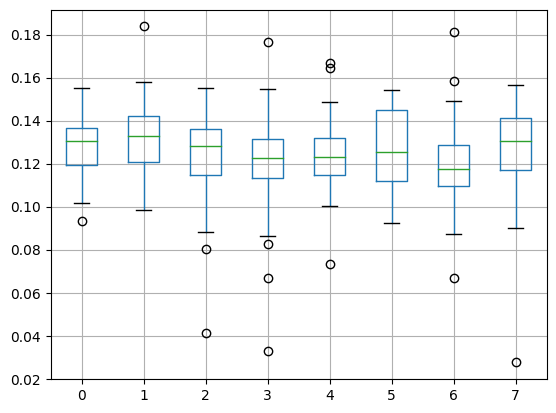

In [40]:
df.iloc[:, 1:].boxplot()